In [11]:
# Import necessary libraries
import pandas as pd
import pylab as pl
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline 
from sklearn.preprocessing import StandardScaler


In [12]:
!pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [34 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
    Using cached wh

In [13]:
# Load the dataset
file_path = 'C:\\Users\\Asus\\Downloads\\heart.csv'
data = pd.read_csv(file_path)

In [14]:
# Step 1: Inspect and clean the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0 

In [15]:
# Step 2: Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

First few rows of the dataset:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    

In [16]:
# Step 3: Check and handle missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Fill missing numerical values with the column mean
data.fillna(data.mean(), inplace=True)


Missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [17]:
# Step 4: Normalize/Standardize numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [18]:
# Step 5: Encode categorical features (if present)
if data.select_dtypes(include=['object']).columns.any():
    data = pd.get_dummies(data, drop_first=True)

In [19]:
# Step 6: Display the dataset after preprocessing
print("\nDataset after preprocessing:")
print(data.head())


Dataset after preprocessing:
        age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall    output  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  0.914529  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  0.914529  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  0.914529  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  0.914529  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  0.914529  


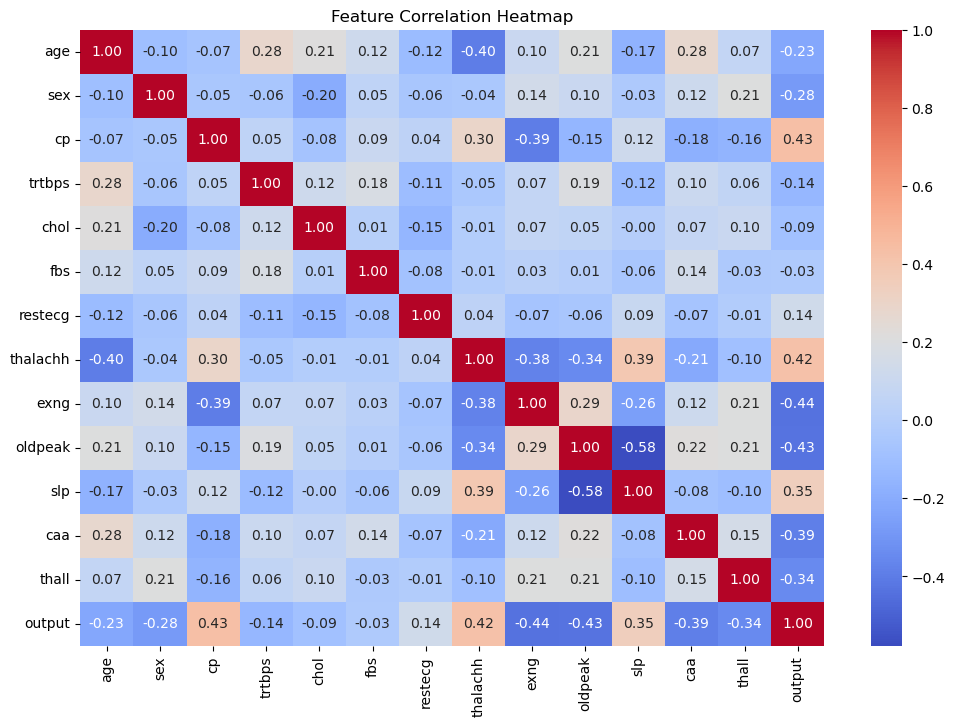

In [20]:
# Step 7: Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


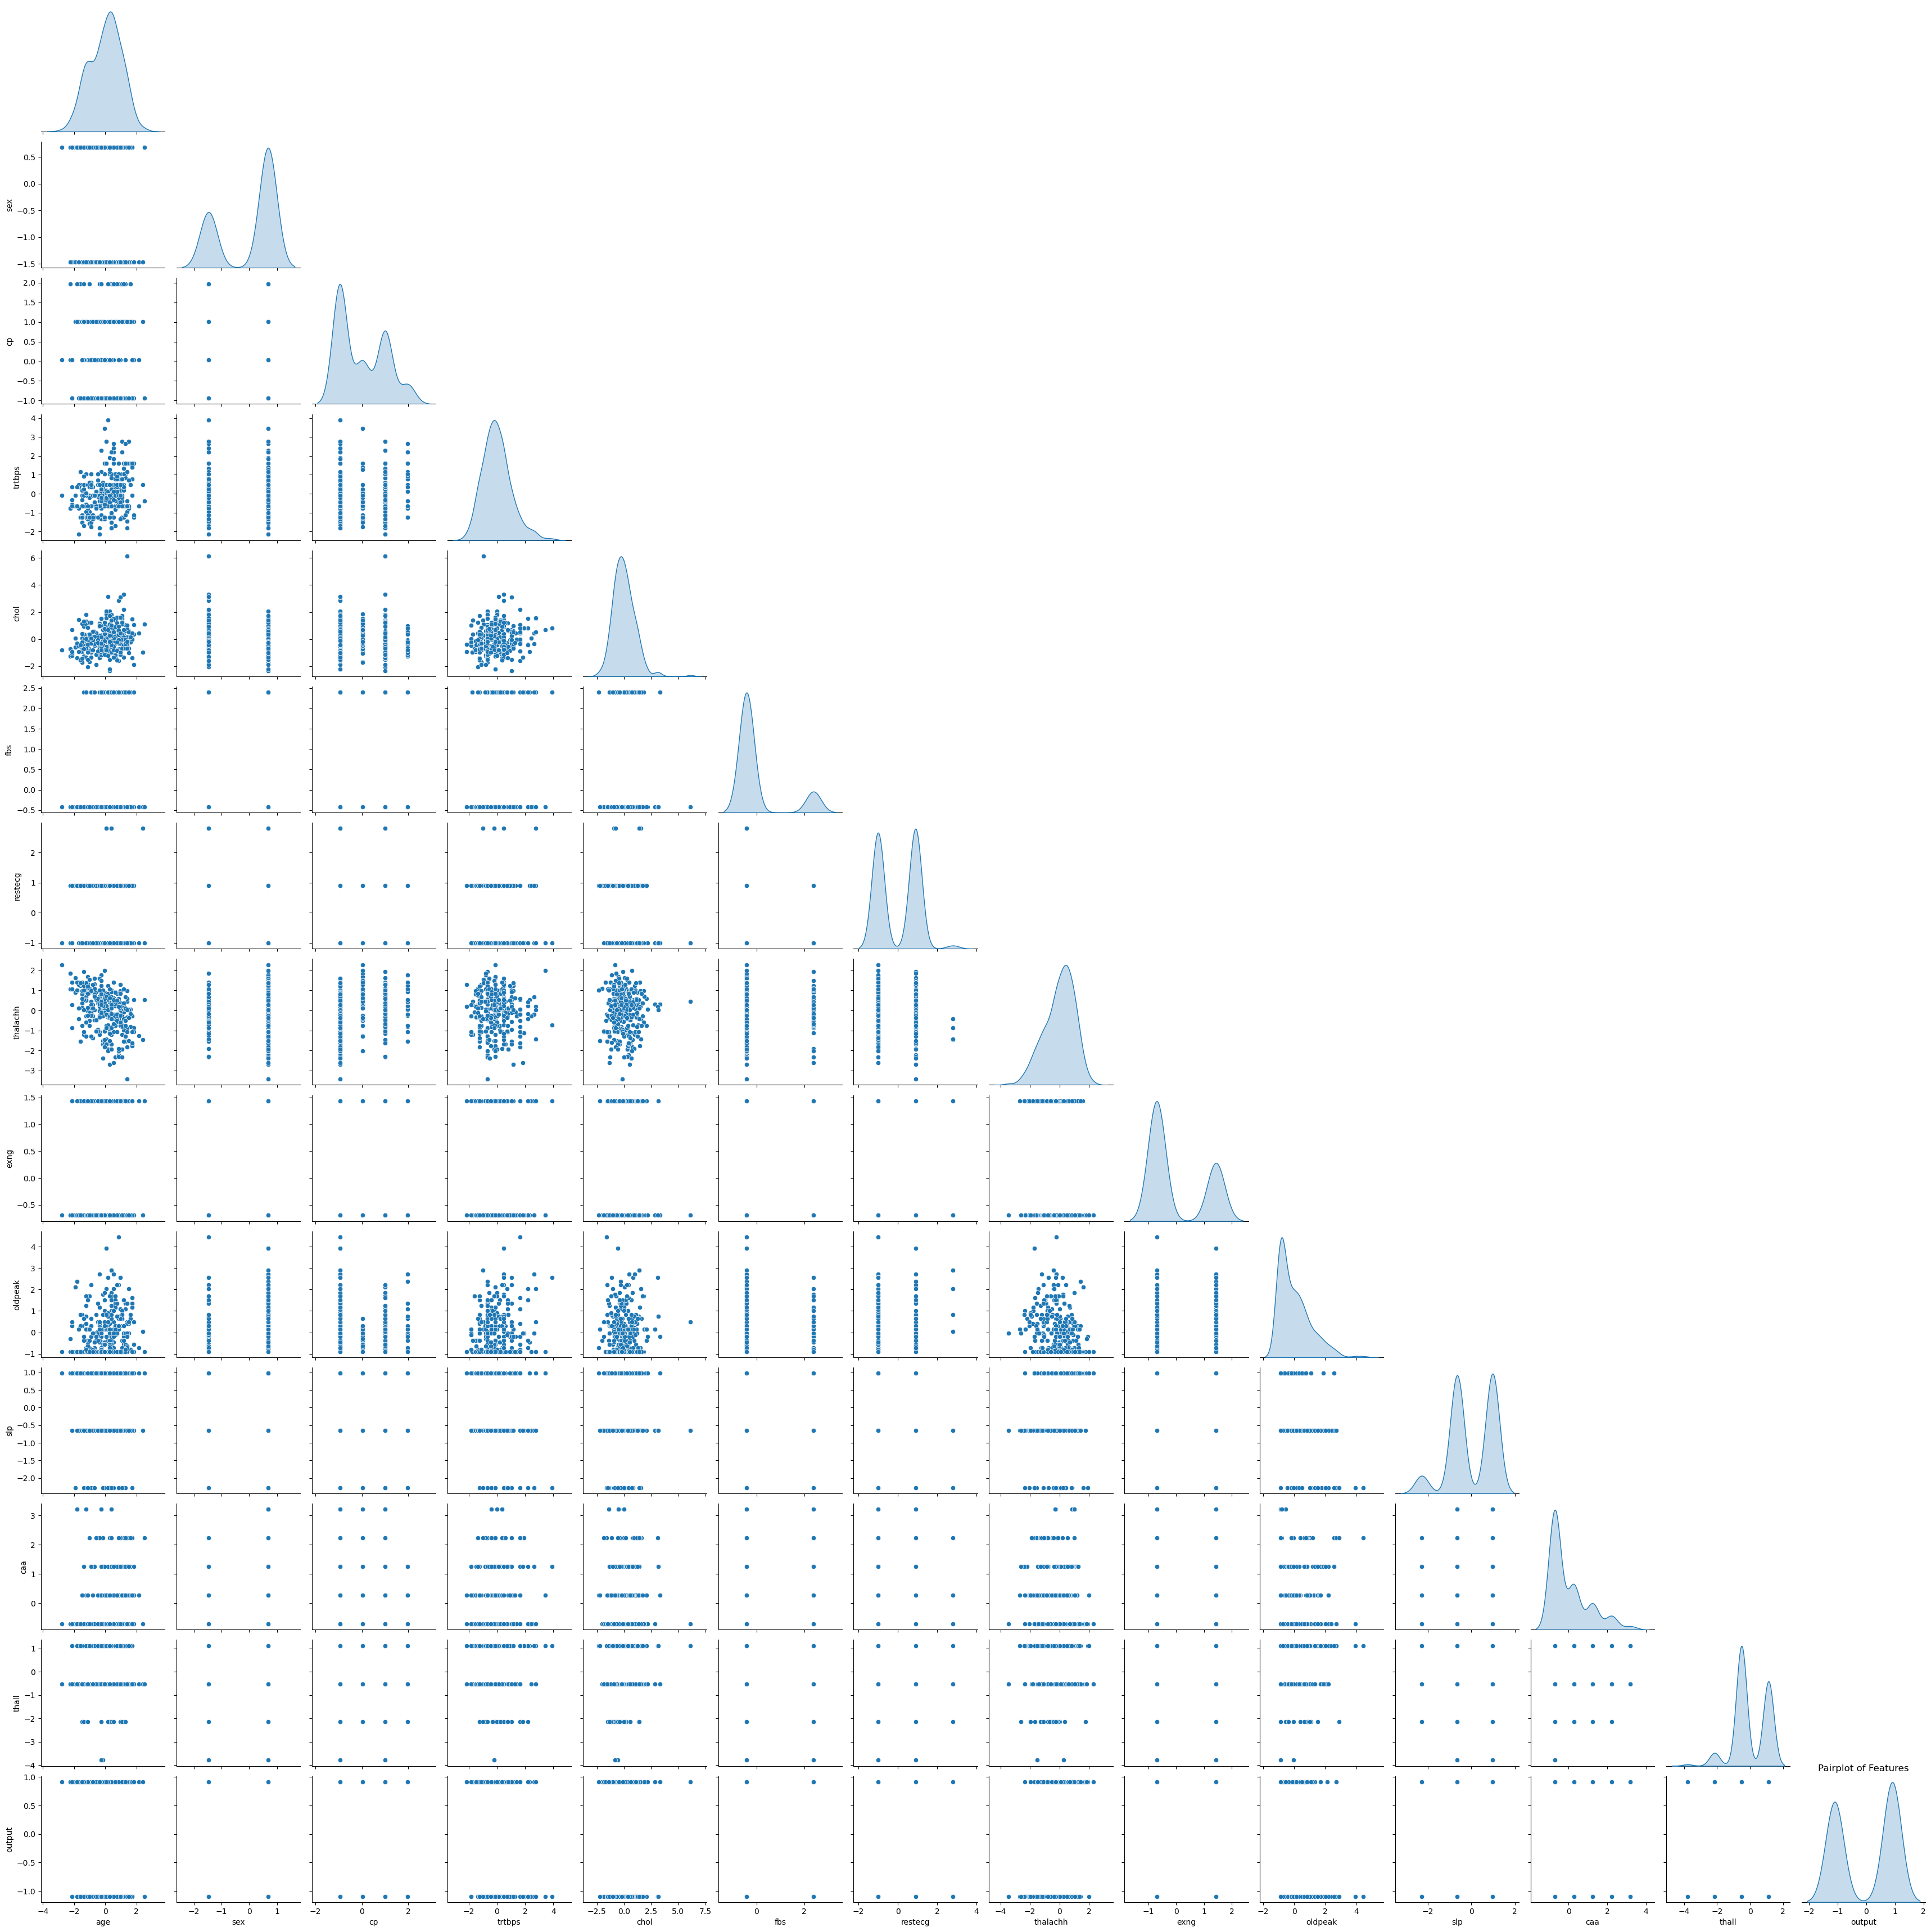

In [21]:
# Step 8: Pairplot (optional, for feature relationships)
sns.pairplot(data, diag_kind='kde', corner=True)
plt.title("Pairplot of Features")
plt.show()

In [22]:
print(data.columns)


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


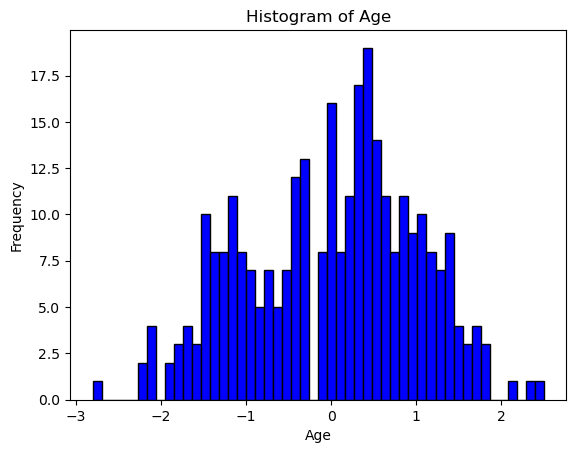

In [23]:
data.hist(column='age', bins=50, grid=False, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [24]:
features = ['age', 'sex', 'exng', 'caa', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh']
target = 'output'

X = data[features]
y = data[target]


In [25]:
# Step 9: Standardize numerical features
columns_to_standardize = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for column in columns_to_standardize:
    mean = data[column].mean()
    std = data[column].std()
    data[column] = (data[column] - mean) / std

print(data.head())


        age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.950624  0.681005  1.973123  0.762694 -0.255910  2.394438 -1.005832   
1 -1.912150  0.681005  1.002577 -0.092585  0.072080 -0.417635  0.898962   
2 -1.471723 -1.468418  0.032031 -0.092585 -0.815424 -0.417635 -1.005832   
3  0.179877  0.681005  0.032031 -0.662770 -0.198030 -0.417635  0.898962   
4  0.289984 -1.468418 -0.938515 -0.662770  2.078611 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall    output  
0  0.015417 -0.696631  1.085542 -2.274579 -0.714429 -2.148873  0.914529  
1  1.630774 -0.696631  2.119067 -2.274579 -0.714429 -0.512922  0.914529  
2  0.975900 -0.696631  0.310399  0.976352 -0.714429 -0.512922  0.914529  
3  1.237849 -0.696631 -0.206364  0.976352 -0.714429 -0.512922  0.914529  
4  0.582975  1.435481 -0.378618  0.976352 -0.714429 -0.512922  0.914529  


In [26]:
# Step 10: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (242, 10)
Testing data shape: (61, 10)


In [27]:
#Standardization (Z-Score Normalization)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
# Step 6: Predict on the test set
y_pred = model.predict(X_test)


In [30]:
print (y_pred [0:5])
print (y_test [0:5])

[-1.09345881 -0.08946481 -0.31034349 -0.39066301  0.55309135]
179   -1.093459
228   -1.093459
111    0.914529
246   -1.093459
60     0.914529
Name: output, dtype: float64


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.4699942363765958
Mean Absolute Error: 0.4967301463608781
R² Score: 0.5326072198275862


In [32]:
threshold = 0.5  # Define a threshold value

# Convert continuous labels into binary labels
y_test = (y_test > threshold).astype(int)
y_pred = (y_pred > threshold).astype(int)

# Now you can use classification metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")



DecisionTree's Accuracy:  0.7049180327868853
Accuracy: 0.7049180327868853
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        29
           1       1.00      0.44      0.61        32

    accuracy                           0.70        61
   macro avg       0.81      0.72      0.69        61
weighted avg       0.82      0.70      0.68        61

Confusion Matrix:
[[29  0]
 [18 14]]


In [33]:
# Display results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7049180327868853
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        29
           1       1.00      0.44      0.61        32

    accuracy                           0.70        61
   macro avg       0.81      0.72      0.69        61
weighted avg       0.82      0.70      0.68        61

Confusion Matrix:
[[29  0]
 [18 14]]


In [34]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
#Visualization

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

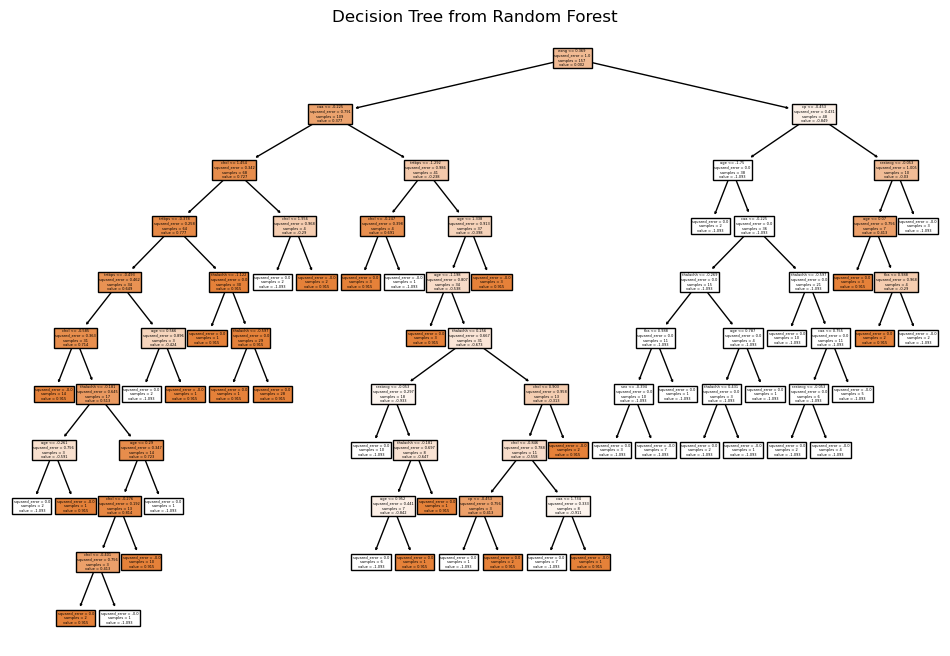

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# انتخاب یکی از درخت‌های تصمیم از مدل RandomForestClassifier
decision_tree = model.estimators_[0]  # اولین درخت از مدل RandomForest

# رسم درخت تصمیم
plt.figure(figsize=(12, 8))  # تنظیم اندازه نمودار
plot_tree(decision_tree, feature_names=features, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()


# K nearest neighbor (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
threshold = 0.5  # Define a threshold value to convert continuous values to binary

# Convert continuous labels into binary labels
y_train = (y_train > threshold).astype(int)  # 1 if y_train > threshold, else 0

# Now you can use the classifier
from sklearn.neighbors import KNeighborsClassifier

k = 4  # Define the number of neighbors
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=4)


In [39]:
print(np.unique(y_test))  # Check unique values in y_test


[0 1]


In [40]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 1])

In [41]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8429752066115702
Test set Accuracy:  0.819672131147541


# other K?

In [42]:
threshold = 0.5  # Define a threshold for binary classification

# Convert continuous y_test labels to binary (if needed)
y_test = (y_test > threshold).astype(int)

# If using predict_proba, convert probabilities to binary
yhat = (neigh.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Now calculate accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.8429752066115702
Test set Accuracy:  0.819672131147541


In [43]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.8264462809917356
Test set Accuracy:  0.8360655737704918


In [44]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print(mean_acc)


[0.83606557 0.75409836 0.80327869 0.81967213 0.81967213 0.83606557
 0.85245902 0.81967213 0.8852459 ]


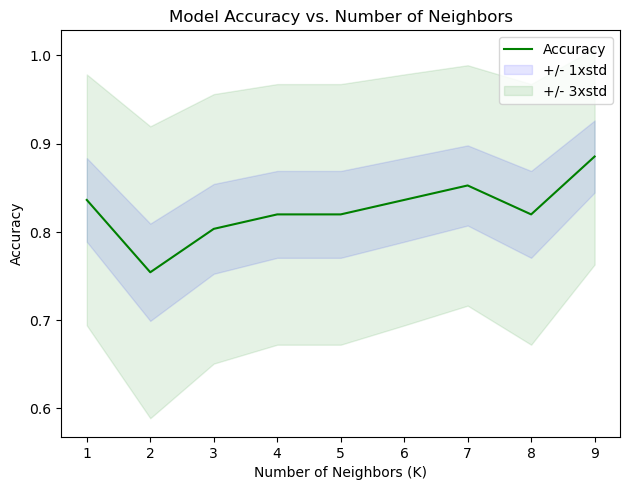

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

# Plot model accuracy for different values of K
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10, color='blue')
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.title('Model Accuracy vs. Number of Neighbors')
plt.show()


# Modeling (SVM with Scikit-learn)

In [46]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [47]:
yhat = clf.predict(X_test)
print(yhat[:5]) 


[0 1 1 0 1]


In [49]:
print(np.unique(y_test))  # مقادیر واقعی
print(np.unique(yhat))    # مقادیر پیش بینی شده

[0 1]
[0 1]


In [52]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])


In [53]:
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [50]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Confusion Matrix:
[[4 1]
 [1 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

Confusion matrix, without normalization
[[4 1]
 [1 4]]


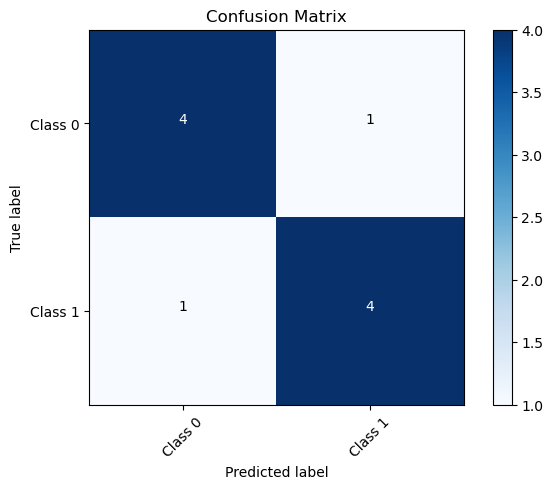

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import itertools

# فرض کنید که y_test و yhat مقادیر واقعی و پیش‌بینی شده هستند.
y_test = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]  # مقادیر واقعی
yhat = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]  # مقادیر پیش‌بینی شده

# محاسبه ماتریس سردرگمی
cnf_matrix = confusion_matrix(y_test, yhat)

# نمایش ماتریس سردرگمی
print("Confusion Matrix:")
print(cnf_matrix)

# نمایش گزارش طبقه‌بندی
print("\nClassification Report:")
print(classification_report(y_test, yhat))

# تابع برای رسم ماتریس سردرگمی
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# نمایش ماتریس سردرگمی
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Class 0', 'Class 1'], normalize=False)
plt.show()